In [1]:
MAIN_PATH = "/home/carlos/MasterDS/tfm"
JSON_DATA_PATH = '{}/data/json/'.format(MAIN_PATH)
CSV_DATA_PATH = '{}/data/csv/'.format(MAIN_PATH)

In [2]:
import sys
sys.path.insert(0, MAIN_PATH)

In [3]:
%load_ext autoreload
%autoreload 2
from scripts.models.ltr_nn_tf.train import LTRNNTFTrain
from scripts.models.ltr_nn_tf.metrics import LTRNNTFMetrics

%reload_ext autoreload

# Entrenamiento

In [6]:
ltr_params = {
    'mode': 'tfidf',
    'count_vec_kwargs': {'strip_accents': 'unicode'},
    'target_metric': 'cosine_emb',
    'metric_params': {'embedding': 'distilroberta-base-paraphrase-v1',
                     'text_process': 'basic'},
    'drop_teams': True,
    'lemma': True,
    'train_perc': 0.7,
    'val_perc': 0.2
}
DENSE_LAYERS = [500, 250, 125, 60, 20]
N_DROPOUT = 4

model_params = {
    'dense_layers': DENSE_LAYERS,
    'dense_activation': ['relu'] * len(DENSE_LAYERS),
    'dropout': [0.3] * N_DROPOUT,
    'optimizer': 'adam'
}
opt_metric = 'mean_squared_error'
epochs = 25
batch_size = 128
# Not in config
shuffle = True
max_queue_size = 50

In [7]:
ltr_train = LTRNNTFTrain(ltr_params, epochs=epochs, batch_size=batch_size,
                         model_params=model_params,
                         opt_metric=opt_metric)

Adding 1 zeros so that params have the same length
Setting target metric to cosine_emb
Setting mode to tfidf
Optimizing mean_squared_error with adam
Epochs: 25
Batch size: 128


In [8]:
ltr_train.experiment_id()

'a42168f3fc'

In [6]:
ltr_train.pipeline()

Loading training data from /home/carlos/MasterDS/tfm/data/ltr/features_targets/c04dabab1a
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               3275500   
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 125)               31375     
_________________________________________________________________
dropout_2 (Dropout)          (None, 125)               0         
________________________________

In [9]:
ltr_train.train()

Writing config in /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/a42168f3fc/config.pickle
Loading training data from /home/carlos/MasterDS/tfm/data/ltr/features_targets/c04dabab1a
Loading validation data from /home/carlos/MasterDS/tfm/data/ltr/features_targets/c04dabab1a
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               3275500   
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 125)         

In [8]:
X_train, y_train = ltr_train.train_data()

Loading training data from /home/carlos/MasterDS/tfm/data/ltr/features_targets/98a1222ae6


In [8]:
type(y_train)

numpy.ndarray

In [9]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [10]:
X_train.shape

(339040, 6550)

## Métricas

Usando el objeto history de Keras:

In [8]:
history = ltr_train.read_model_info()

In [9]:
history

{'loss': [0.006594467908143997,
  0.005717827472835779,
  0.005536614451557398,
  0.0054015424102544785,
  0.005282953847199678,
  0.005167818628251553,
  0.005066987127065659,
  0.00498632388189435,
  0.004906110931187868],
 'mean_squared_error': [0.006594467908143997,
  0.005717827472835779,
  0.005536614451557398,
  0.0054015424102544785,
  0.005282953847199678,
  0.005167818628251553,
  0.005066987127065659,
  0.00498632388189435,
  0.004906110931187868],
 'mean_absolute_error': [0.0624946728348732,
  0.058378517627716064,
  0.05730775371193886,
  0.05648503452539444,
  0.055747658014297485,
  0.055008985102176666,
  0.05434344336390495,
  0.0537898875772953,
  0.05327954515814781],
 'val_loss': [0.005934353917837143,
  0.005559289362281561,
  0.005578492768108845,
  0.005531434901058674,
  0.005536980926990509,
  0.00552388047799468,
  0.005628963932394981,
  0.005675422493368387,
  0.005588785745203495],
 'val_mean_squared_error': [0.005934353917837143,
  0.005559289362281561,
  

Usando nuestros procesos:

In [30]:
ltr_metrics = LTRNNTFMetrics(ltr_train)

In [31]:
ltr_metrics.run()

Computing metric for train dataset
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/a42168f3fc/train_metrics.pickle
Computing metric for validation dataset
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/a42168f3fc/validation_metrics.pickle
Computing metric for test dataset
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/a42168f3fc/test_metrics.pickle


Reading metrics from /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/a42168f3fc/train_metrics.pickle
mse : 0.004615266375902816
mae : 0.05153797608457757
r2 : 0.5700226475531701


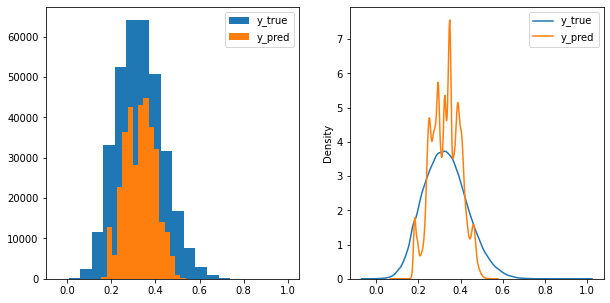

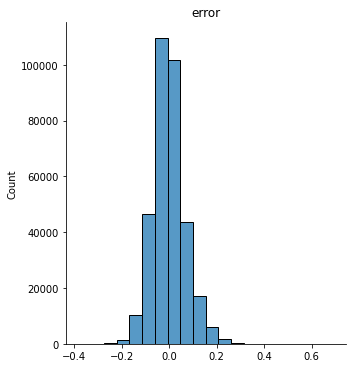

In [34]:
ltr_metrics.show_metrics('train')

Reading metrics from /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/a42168f3fc/validation_metrics.pickle
mse : 0.0055887854414473715
mae : 0.05777693160477966
r2 : 0.4776590925545635


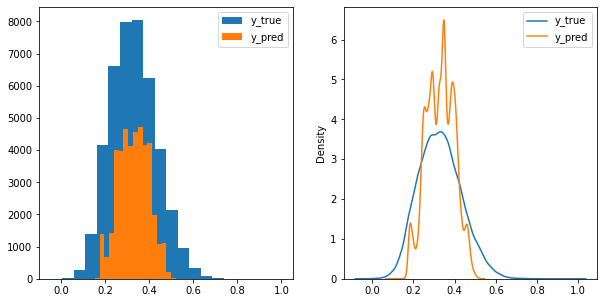

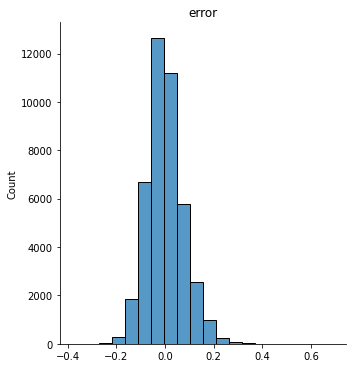

In [35]:
ltr_metrics.show_metrics('validation')

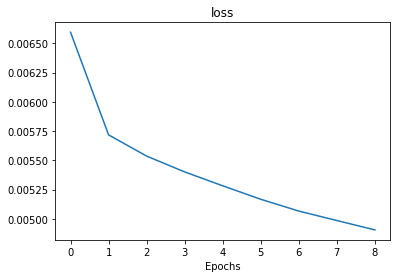

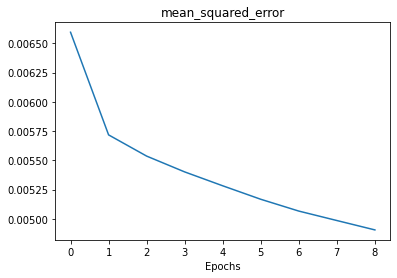

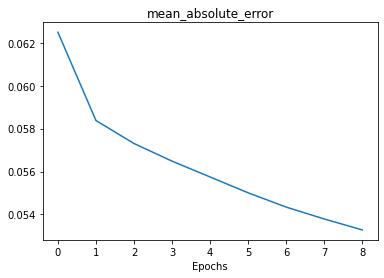

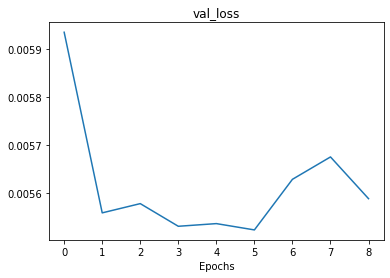

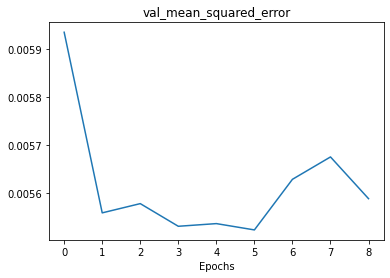

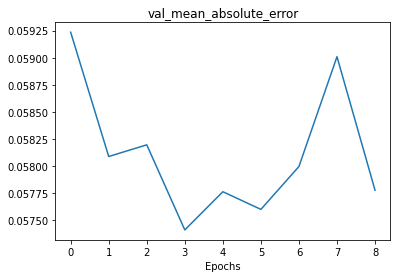

In [36]:
ltr_metrics.show_metrics_history()